In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import svm
import random

0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55    56  57  
0     0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1     0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2     0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3     0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4     0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  
...     ...  ...    ...    ...    ...    ...  ...   ...  ..  
4596  0.232  0.0  0.000  0.000  0.000  1.142    3    88   0  
4597  0.000  0.0  0.353  0.000  0.000  1.555    4    14   0  
4598  0.718  0.0  0.000  0.000  0.000  1.404    6   118   0  
4599  0.057  0.0  0.000  0.000  0.000  1.147    5    78   0  
4600  0.000  0.0  0.125  0.000  0.000  1.250    5    40   0  

[4601 rows x 58 columns]

0    2788
1    1813
Name: 57, dtype: int64

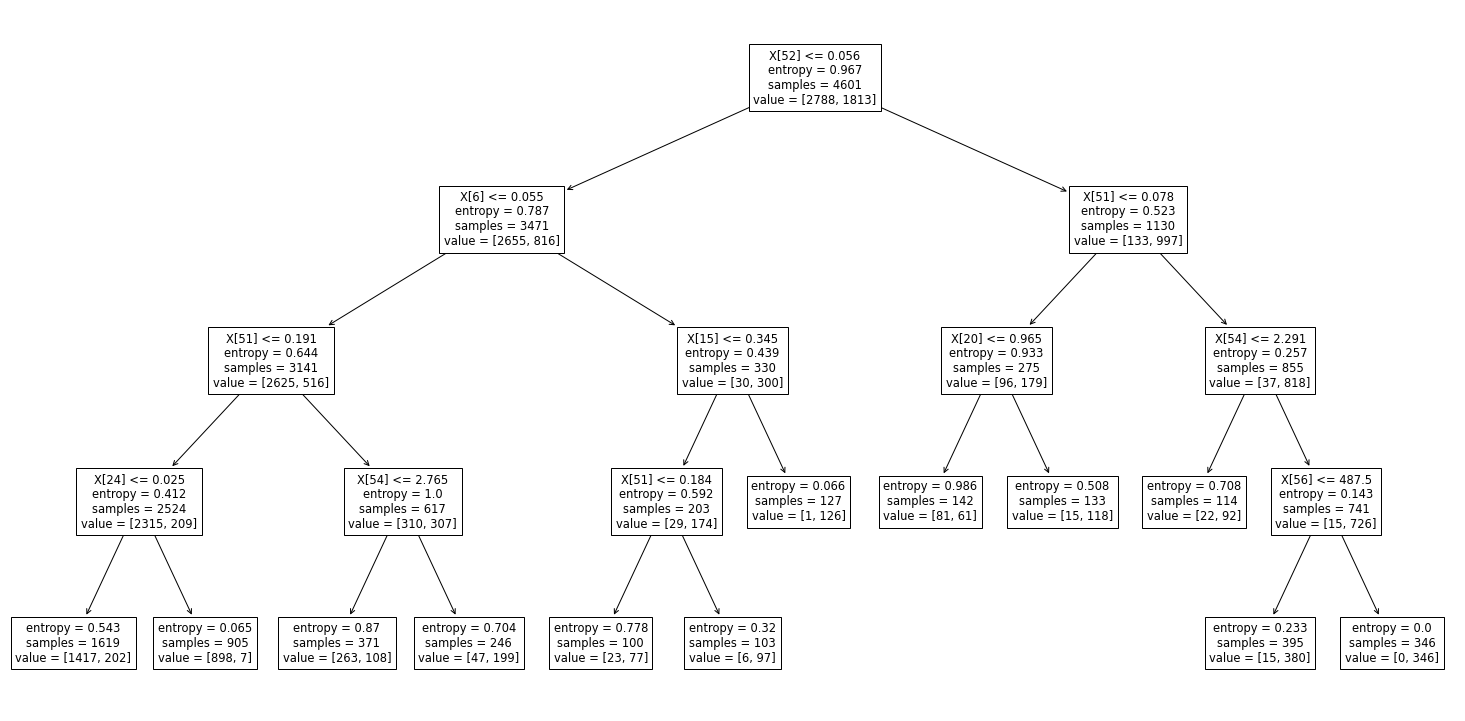

In [160]:
data = pd.read_csv('./data/spambase.data', header=None)
display(data)
output=pd.value_counts(data.iloc[:,-1])
display(output)

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decisionTree = DecisionTreeClassifier(criterion='entropy',
                            max_depth=4,
                            min_samples_leaf=100)
decisionTree.fit(X, y)
plt.figure(figsize=(26,13))
plot_tree(decisionTree);

921
[2, 22, 23, 45, 56, 63, 68, 70, 73, 99, 104, 108, 118, 121, 123, 133, 161, 165, 169, 175, 179, 188, 211, 230, 234, 259, 264, 266, 272, 280, 287, 294, 302, 307, 325, 329, 334, 348, 349, 350, 359, 369, 373, 374, 380, 390, 409, 445, 447, 469, 474, 487, 491, 524, 540, 558, 574, 587, 595, 597, 606, 627, 634, 654, 675, 693, 727, 739, 752, 756, 760, 763, 779, 786, 790, 792, 802, 819, 825, 827, 843, 850, 851, 864, 866, 868, 878, 889, 898, 919, 923, 927, 933, 948, 957, 959, 976, 979, 983, 984]


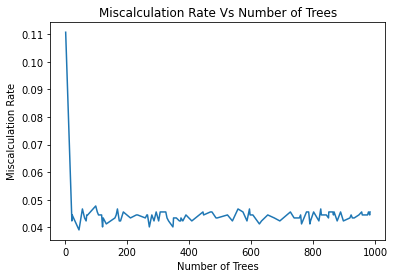

In [66]:

totalNumberOfDataSets=X_test.shape[0]
print(totalNumberOfDataSets)
miscalcs=[]
nTrees=[]
ran=random.sample(range(0, 1000), 100)
ran.sort()
print(ran)
for nTree in ran:
    rf=RandomForestClassifier(n_estimators=nTree)
    model=rf.fit(X_train,y_train)
    modelPredict=model.predict(X_test)
    cm=confusion_matrix(y_test, modelPredict)
    fp=cm[0,1]
    fn=cm[1,0]
    miscalc=(fp+fn)/totalNumberOfDataSets
    miscalcs.append(miscalc)
    nTrees.append(nTree)
    




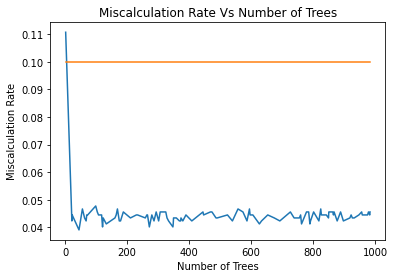

In [161]:
optimalTrees= nTrees[miscalcs.index(min(miscalcs))]
print(optimalTrees)

rfModel=RandomForestClassifier(n_estimators=optimalTrees)
fit=rfModel.fit(X_train,y_train)
modelPredict=model.predict(X_test)
cm=confusion_matrix(y_test, modelPredict)
fp=cm[0,1]
fn=cm[1,0]
miscalc=(fp+fn)/totalNumberOfDataSets
print("confusion matrix for random forest:")
print(cm)
print("miscalc rate for random forest: ")
print(miscalc)


gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=20),
                     param_grid={'max_depth': np.arange(1,31)},
                     scoring='roc_auc',
                     cv=5)
gs_dt.fit(X_train, y_train)
dtModel=gs_dt.best_estimator_
print("================")
predictions=dtModel.predict(X_test)
cm_dt=confusion_matrix(y_test,predictions)
fp_dt=cm_dt[0,1]
fn_dt=cm_dt[1,0]
miscalc_dt=(fp_dt+fn_dt)/totalNumberOfDataSets
print("confusion matrix for decision tree:")
print(cm_dt)
print("miscalc rate for decision tree: ")
print(miscalc_dt)


45
confusion matrix for random forest:
[[520  11]
 [ 31 359]]
miscalc rate for random forest: 
0.04560260586319218
confusion matrix for decision tree:
[[513  18]
 [ 74 316]]
miscalc rate for decision tree: 
0.0998914223669924


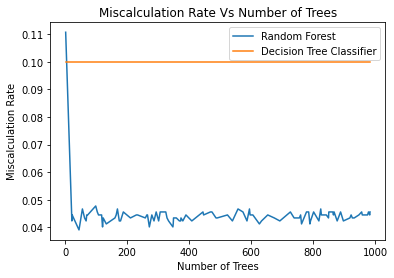

In [168]:
a=np.empty(len(nTrees)); 
a.fill(miscalc_dt)

plt.plot(nTrees,miscalcs,label='Random Forest')
plt.plot(nTrees,a,label='Decision Tree Classifier')
plt.title('Miscalculation Rate Vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Miscalculation Rate')
plt.legend()
plt.show()

In [176]:
# non_spam_emails=X_train[X_train[57]==0]
# clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
# clf.fit(X_train)
# display(y_train[y_train[0]==0])
# X = data.iloc[:,:-1]
# y = data.iloc[:,-1]

train,test=train_test_split(data,test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)
print("counts in train data:")
print(train[57].value_counts())
print("counts in test data:")
print(test[57].value_counts())

noofSpam_test=test[57].value_counts()[0]
noofNonSpam_test=test[57].value_counts()[1]
noofData_test = test.shape[0]

X_train=train[train[57]==0]
X_train=X_train.iloc[:,:-1]

# display(train)
# display(X_train)

clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma="auto")
clf.fit(X_train)
y_pred_train = clf.predict(train.iloc[:,:-1])
n_error_train = y_pred_train[y_pred_train == -1].size
print("No of spams detected by model in training set:")
print(n_error_train)

y_pred_test = clf.predict(test.iloc[:,:-1])
y_pred_non_spam = y_pred_test[y_pred_test == -1].size
y_pred_spam = y_pred_test[y_pred_test == 1].size
print("No of spams detected by model in test set:")
print(y_pred_non_spam)
print("No of non-spams detected by model in test set:")
print(y_pred_spam)

tot_miscalc = abs(y_pred_non_spam - noofNonSpam_test) + abs(y_pred_spam - noofSpam_test)
tot_miscalc_rate = tot_miscalc / noofData_test
print("miscalculation rate:")
print(tot_miscalc_rate)




(3680, 58)
(921, 58)
counts in train data:
0    2257
1    1423
Name: 57, dtype: int64
counts in test data:
0    531
1    390
Name: 57, dtype: int64
No of spams detected by model in training set:
1581
No of spams detected by model in test set:
527
No of non-spams detected by model in test set:
394
miscalculation rate:
0.2975027144408252


In [59]:
X = np.array([1.5, 1]).T
x=0.5
beta = np.array([1, 0.5]).T
I = np.array([1,1])
np.logspace(2.0, 3.0, num=4)
# lambdas = [0,0.25,0.5,0.75,1.00,1.25,1.50,1.75,2.00]
lambdas = [0.25]
bias_squared=[]
for l in lambdas:
    b2= (x*((np.dot(X.T,X) + (np.dot(l,I)))**-1)*((np.dot(X.T,X))*beta).T) - np.dot(beta,x)
    t1=((np.dot(X.T, X)+np.dot(l,I))**-1)
    t2=((X.T * X)*beta).T
    t3=np.dot(beta,X.T)
 
    bias_squared.append(b2)
print(bias_squared)    

[array([-0.03571429, -0.01785714])]
